# Project TSDN

## Project Title

**Real-Time Cyber Threat Detection and Prevention with Cutting-Edge AI-Powered Web Attack Monitoring** Dalam bahasa indonesia "***deteksi dan pencegahan ancaman siber secara real-time dengan memanfaatkan teknologi AI terkini untuk memonitor serangan web***".
<br><br>
Dataset dalam projek ini diambil dari Kaggle pada  link https://www.kaggle.com/datasets/alextrinity/sqli-xss-dataset/code

## Project Description

Projek ini dibuat untuk membantu mengamankan web dari serangan cyber. Cara kerja Projek ini adalah dengan cara mendeteksi serangan SQL Injection dan XSS yang biasanya merak terjadi pada banyak situs. Projek ini juga akan dilengkapi dengan Monitoring keamanan secara realtime lebih lengkap tentang projek ini dibahas di proposal project

Berikut ini adalah Inscope dan outscope project yang dikerjakan :

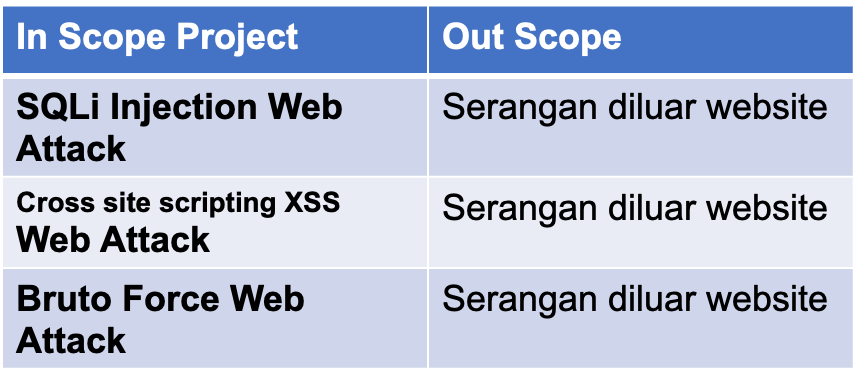

## Bussiness Understanding
Ancaman dan serangan pada website masih sangat sering terjadi karena memang menjadi target sasaran termudah bagi pelaku kejahatan, kominfo sendiri dalam artikel website resminya mengumumkan sebanyak 50%  dari situs pemerintah diserang hacker (https://www.kominfo.go.id/content/detail/1493/50-persen-situs-pemerintah-diserang-hacker/0/berita).



# Import Library

In [1]:
pip install unidecode

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
import chardet
import seaborn as sns
import plotly.express as px

from unidecode import unidecode
import re

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

from imblearn.over_sampling import RandomOverSampler
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import joblib
# from keras.models import load_model
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.random_projection import SparseRandomProjection
from sklearn.decomposition import TruncatedSVD

from sklearn.model_selection import  cross_validate, cross_val_score, KFold, StratifiedKFold, GridSearchCV
from sklearn.multioutput import MultiOutputClassifier

import time

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Understanding

In [107]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## Read the data

In [108]:
#Detect encoding type
data = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/Data'

with open(data+'/SQLInjection_XSS_CommandInjection_MixDataset.1.0.0.csv','rb') as rawdata:
  result = chardet.detect(rawdata.read(100000))

print(result)


{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}


In [109]:
data = pd.read_csv(data+'/SQLInjection_XSS_CommandInjection_MixDataset.1.0.0.csv',encoding='utf-8')

In [110]:
data.head()

,Sentence,SQLInjection,XSS,CommandInjection,Normal
0,""" or pg_sleep ( __TIME__ ) --",1.0,0.0,0.0,0.0
1,create user name identified by pass123 tempora...,1.0,0.0,0.0,0.0
2,%29,1.0,0.0,0.0,0.0
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1.0,0.0,0.0,0.0
4,select * from users where id = '1' or @ @1 = ...,1.0,0.0,0.0,0.0


# Explanotory Data Analist

### Liat Data Profiling

In [111]:
data.dtypes

Sentence             object
SQLInjection        float64
XSS                 float64
CommandInjection    float64
Normal              float64
dtype: object

In [112]:
data.isna().sum()

Sentence            0
SQLInjection        0
XSS                 0
CommandInjection    0
Normal              0
dtype: int64

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206636 entries, 0 to 206635
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sentence          206636 non-null  object 
 1   SQLInjection      206636 non-null  float64
 2   XSS               206636 non-null  float64
 3   CommandInjection  206636 non-null  float64
 4   Normal            206636 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.9+ MB


In [114]:
data.XSS.unique()

array([0., 1.])

In [115]:
data.CommandInjection.unique()

array([0., 1.])

In [116]:
data.SQLInjection.unique()

array([1., 0.])

In [117]:
data.head()


,Sentence,SQLInjection,XSS,CommandInjection,Normal
0,""" or pg_sleep ( __TIME__ ) --",1.0,0.0,0.0,0.0
1,create user name identified by pass123 tempora...,1.0,0.0,0.0,0.0
2,%29,1.0,0.0,0.0,0.0
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,1.0,0.0,0.0,0.0
4,select * from users where id = '1' or @ @1 = ...,1.0,0.0,0.0,0.0


### Cek jumlah data

In [118]:
data.shape

(206636, 5)

### Cek distribusi label injected vs not injected

In [119]:
fig = px.histogram(data[['SQLInjection','XSS','CommandInjection','Normal']], barmode='group', title='Distribusi Kelas A, B, dan C')
fig.update_layout(xaxis_title='Nilai', yaxis_title='Frekuensi')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

# Data Preparation

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206636 entries, 0 to 206635
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Sentence          206636 non-null  object 
 1   SQLInjection      206636 non-null  float64
 2   XSS               206636 non-null  float64
 3   CommandInjection  206636 non-null  float64
 4   Normal            206636 non-null  float64
dtypes: float64(4), object(1)
memory usage: 7.9+ MB


In [121]:
data.isnull().sum()

Sentence            0
SQLInjection        0
XSS                 0
CommandInjection    0
Normal              0
dtype: int64

In [122]:
data.duplicated().sum()

6836

In [123]:
data.drop_duplicates(inplace=True)

In [124]:

data.duplicated().sum()

0

## Join Column to One

In [125]:
data['Label'] = data[['SQLInjection', 'XSS', 'CommandInjection', 'Normal']].idxmax(axis=1)

# Hapus kolom-kolom yang tidak diperlukan
data.drop(['SQLInjection', 'XSS', 'CommandInjection', 'Normal'], axis=1, inplace=True)

In [126]:
data

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",SQLInjection
1,create user name identified by pass123 tempora...,SQLInjection
2,%29,SQLInjection
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,SQLInjection
4,select * from users where id = '1' or @ @1 = ...,SQLInjection
...,...,...
206631,"I am not a parent, neither am I a male. But I ...",CommandInjection
206632,This shorter movie is the epitome the expected...,CommandInjection
206633,Dead Gentlemen Productions has put together a ...,CommandInjection
206634,This movie caught me by surprise. For years I ...,CommandInjection


In [127]:
data.nunique()

Sentence    199797
Label            4
dtype: int64

## Change Data Typpe

## Encode Variable Output

In [128]:
labelencoder = LabelEncoder()
data['Label_encode'] = labelencoder.fit_transform(data['Label'])

In [129]:
data

,Sentence,Label,Label_encode
0,""" or pg_sleep ( __TIME__ ) --",SQLInjection,2
1,create user name identified by pass123 tempora...,SQLInjection,2
2,%29,SQLInjection,2
3,' AND 1 = utl_inaddr.get_host_address ( ( S...,SQLInjection,2
4,select * from users where id = '1' or @ @1 = ...,SQLInjection,2
...,...,...,...
206631,"I am not a parent, neither am I a male. But I ...",CommandInjection,0
206632,This shorter movie is the epitome the expected...,CommandInjection,0
206633,Dead Gentlemen Productions has put together a ...,CommandInjection,0
206634,This movie caught me by surprise. For years I ...,CommandInjection,0


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199800 entries, 0 to 206635
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Sentence      199800 non-null  object
 1   Label         199800 non-null  object
 2   Label_encode  199800 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 6.1+ MB


In [134]:
unique_values = data[["Label", "Label_encode"]].drop_duplicates()

# Tampilkan nilai unik
print(unique_values)

                   Label  Label_encode
0           SQLInjection             2
57308             Normal             1
109525               XSS             3
156636  CommandInjection             0


## Cleansing Word

In [32]:
data.to_csv('/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib/datadimention.csv')

In [33]:
X = data['Sentence']
y = data['Label_encode']
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)

In [58]:
# sentences = [sentence.split() for sentence in data['Sentence']]
# word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

# # Membangun vektor untuk tiap kalimat
# X = []
# for sentence in sentences:
#     vectors = [word2vec_model.wv[word] for word in sentence if word in word2vec_model.wv]
#     if vectors:
#         X.append(np.mean(vectors, axis=0))
#     else:
#         X.append(np.zeros(word2vec_model.vector_size))  # Jika tidak ada kata yang ditemukan, gunakan vektor nol

In [59]:
# X = np.array(X)
# y = np.array(data.drop('Sentence', axis=1))

## Handling Imbalance Data

Pada tahap Explanotory data analisis pada visualisasi dg plot, kita dapat melihat bahwa terdapat data yang inbalace, sehingga perlu dilakukan inbalancing treatmen, Kami akan mencoba menyeimbangkan data kami menggunakan SMOTE kemudian melakukan klasifikasi

In [34]:
y_array = np.array(y)

In [35]:
oversample = RandomOverSampler(sampling_strategy='auto', random_state=42)

In [36]:
X_resampled, y_resampled = oversample.fit_resample(X_tfidf, y_array)

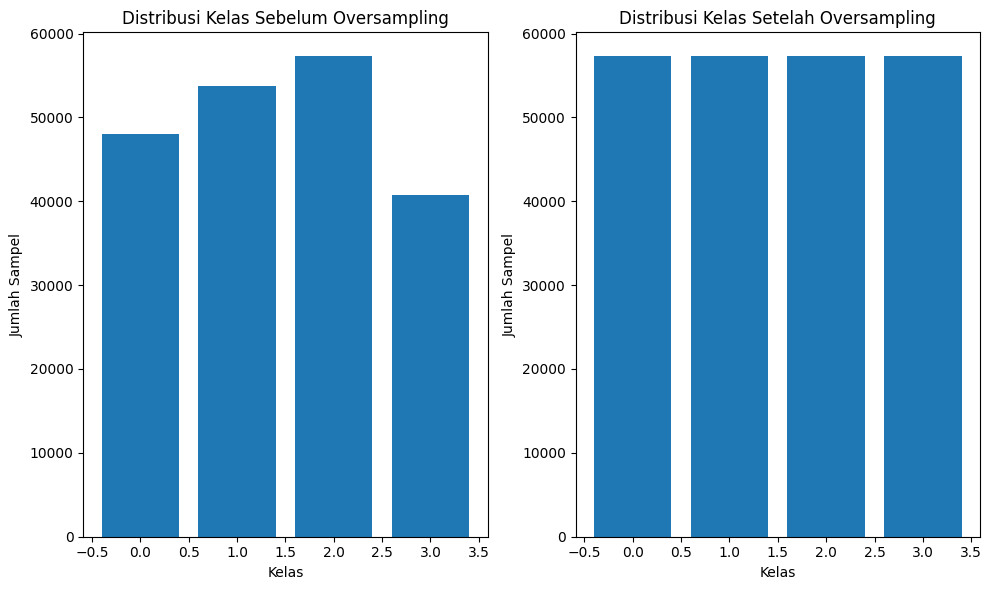

In [37]:
# Menghitung jumlah sampel untuk setiap kelas sebelum oversampling
before_oversampling = data['Label_encode'].value_counts()

# Menghitung jumlah sampel untuk setiap kelas setelah oversampling
after_oversampling = pd.Series(y_resampled).value_counts()

# Plotting histogram atau barplot
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(before_oversampling.index, before_oversampling.values)
plt.title('Distribusi Kelas Sebelum Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')

plt.subplot(1, 2, 2)
plt.bar(after_oversampling.index, after_oversampling.values)
plt.title('Distribusi Kelas Setelah Oversampling')
plt.xlabel('Kelas')
plt.ylabel('Jumlah Sampel')

plt.tight_layout()
plt.show()

# Modeling

## Bagi Data Train dan Testing

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(183296, 669657)
(183296,)
(45824, 669657)
(45824,)


In [39]:
# pca = PCA(n_components=100)
#PCA tidak digunakan karena memakan banyak memori

# Percobaan dg SparceRandom Namun perfoma model turun signifikan
# srp = SparseRandomProjection(n_components=100)

svd = TruncatedSVD(n_components=100)

# Reduksi dimensi fitur untuk data train dan test
X_train_svd = svd.fit_transform(X_train)
X_test_svd = svd.transform(X_test)

In [40]:
print(X_train_svd.shape)
print(X_test_svd.shape)

(183296, 100)
(45824, 100)


## Pemilihan Model

In [67]:
#Kami sudah melakukan UJI dengan KNN namun dengan dimensi data yang ada memiliki waktu fit dan predict sangat
#lama diatas 2 jam meskipun sudah di ubah banyak parameter

models = [
    LogisticRegression(solver='saga', max_iter=100),
    # KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=50, n_jobs=-1),  # Gunakan n_jobs=-1 untuk KNeighborsClassifier
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=3),
    AdaBoostClassifier(n_estimators=50, learning_rate=1)
]


modellabel = [
    'LogisticRegression',
    # 'KNeighborsClassifier',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'AdaBoostClassifier'
]


In [68]:
for i, model in enumerate(models):
  start_time = time.time()
  model.fit(X_train_svd,y_train)
  prediction_test = model.predict(X_test_svd)
  end_time = time.time()
  print('Model {0}'.format(modellabel[i]))
  print('Time taken to train and predict: {:.4f} seconds'.format(end_time - start_time))
  print('Accuracy of classifier train data: {:.3f}'.format(model.score(X_train_svd, y_train)))
  print('Accuracy ofclassifier test data: {:.3f}'.format(model.score(X_test_svd, y_test)))
  print(metrics.classification_report(y_test, prediction_test))
  print('---------------------------------')

Model LogisticRegression
Time taken to train and predict: 12.0547 seconds
Accuracy of classifier train data: 0.897
Accuracy ofclassifier test data: 0.895
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     11544
           1       0.75      0.92      0.82     11433
           2       0.95      0.93      0.94     11339
           3       1.00      0.98      0.99     11508

    accuracy                           0.90     45824
   macro avg       0.91      0.90      0.90     45824
weighted avg       0.91      0.90      0.90     45824

---------------------------------
Model DecisionTreeClassifier
Time taken to train and predict: 18.6679 seconds
Accuracy of classifier train data: 0.875
Accuracy ofclassifier test data: 0.872
              precision    recall  f1-score   support

           0       0.81      0.80      0.81     11544
           1       0.77      0.81      0.79     11433
           2       0.93      0.90      0.91     11339
  

Logistik regression memiliki akurasi yg lebih tinggi baik dari data training dan testing, namun perlu kita lihat presisi 100% bisa jadi overfitting. DecisionTreeClassifier menjadi pilihan karena memiliki akurasi tinggi dan seimbang baik training dan testing dan pada precision,recall, f1-score memiliki score yg baik dan tidak signifikan

## Pemilihan Model Mechine Leaning

Dari hasil yang diberikan hampir semua model dapat dianggap sebagai pilihan yang baik karena  memiliki akurasi pengujian yang baik. Namun team memilih DecisionTree karena memiliki akurasi baik data training dan tersting dengan akurasi yang baik dan seimbang.

In [41]:
model_dcc = DecisionTreeClassifier(max_depth=5)
model_dcc.fit(X_train_svd,y_train)

# Make predictions
prediction_test = model_dcc.predict(X_test_svd)
print (metrics.accuracy_score(y_test, prediction_test))

0.8721194134078212


In [42]:
print('Accuracy of classifier train data: {:.3f}'.format(model_dcc.score(X_train_svd, y_train)))
print('Accuracy ofclassifier test data: {:.3f}'.format(model_dcc.score(X_test_svd, y_test)))

Accuracy of classifier train data: 0.875
Accuracy ofclassifier test data: 0.872


# Evaluation

## Check Clasification Report

In [73]:
print(metrics.classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81     11544
           1       0.77      0.81      0.79     11433
           2       0.93      0.90      0.91     11339
           3       0.98      0.98      0.98     11508

    accuracy                           0.87     45824
   macro avg       0.87      0.87      0.87     45824
weighted avg       0.87      0.87      0.87     45824



## Model Validasi dengan Cross validation







In [74]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_dcc, X_train_svd, y_train, cv=kfold)
print('Cross-validation scores: {:.3f}'.format(scores.mean()))

Cross-validation scores: 0.875


## Model Validasi dengan Stratified k-fold cross validation

In [75]:
skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model_dcc, X_train_svd, y_train, cv=skfold)
print("Stratified K-Fold Cross-validation scores: {:.3f}".format(scores.mean()))

Stratified K-Fold Cross-validation scores: 0.875


## Percobaan Hyper Parameter tuning

In [ ]:
# Definisi hyperparameter yang akan diuji
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}


# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=model_dcc, param_grid=param_grid, cv=skfold, scoring='accuracy')

# Melakukan hyperparameter tuning pada data latihan
grid_search.fit(X_train_svd, y_train)

# Menampilkan hyperparameter terbaik
print("Hyperparameter terbaik:", grid_search.best_params_)

# Evaluasi model pada data uji
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test_svd, y_test)
print("Akurasi pada data uji:", accuracy)

Best Parameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 10, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      3850
           1       1.00      0.58      0.73      2270

    accuracy                           0.84      6120
   macro avg       0.90      0.79      0.81      6120
weighted avg       0.87      0.84      0.83      6120



Setelah dilakukan Hyperparameter model tidak lebih baik, sehingga akan menggunakan model Decision Tree dengan akurasi testing kurang lebih 87%

# Deployment Model

In [44]:
path = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib'

In [45]:
# Save the model using joblib
joblib.dump(model_dcc, path+'/webscuritymodel.joblib')

['/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib/webscuritymodel.joblib']

## Test & Predict Model

In [46]:
# Load the saved model from the HDF5 file
model_path = path+'/webscuritymodel.joblib'
loaded_model = joblib.load(model_path)

In [48]:
loaded_prediction_test = loaded_model.predict(X_test_svd)

# Create a DataFrame to display the results
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': loaded_prediction_test})

# Display the results
print("Results (Loaded Model):")
print(results_df)

# Evaluate the accuracy
accuracy = metrics.accuracy_score(y_test, loaded_prediction_test)
print("Accuracy (Loaded Model):", accuracy)

Results (Loaded Model):
       Actual  Predicted
0           2          2
1           2          2
2           2          2
3           1          1
4           3          3
...       ...        ...
45819       1          1
45820       3          3
45821       1          1
45822       1          1
45823       2          2

[45824 rows x 2 columns]
Accuracy (Loaded Model): 0.8721194134078212


In [141]:
results_df.to_csv('resultmodel')

In [59]:
loaded_prediction_test

array([2, 2, 2, ..., 1, 1, 2])

In [67]:
y_test

array([2, 2, 2, ..., 1, 1, 2])

## Create Function to Deployment

Ini adalah function yang nanti akan disimpan di API server

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
from sklearn.decomposition import TruncatedSVD

In [100]:
sentenceinject = "or pg_sleep ( __TIME__ "

In [95]:
# Load the saved model from the HDF5 file
path = '/content/gdrive/MyDrive/Datasans Compotition/TSDN/Real-Time Cyber Threat Detection and Prevention with Cutting Edge AI Powered Web Attack Monitoring/Source/WebApps/Export Model Joblib'
model_path = path+'/webscuritymodel.joblib'
loaded_model = joblib.load(model_path)
data = pd.read_csv(path+'/datadimention.csv')

##Predict New Text

In [138]:
sentence_inject = "find . -type f -exec grep -il confirm {} \;"

In [142]:
query = sentence_inject
X = data['Sentence']
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(X)
# Vectorize the input using the same vectorizer used during training
query_vectorized = vectorizer.transform([query])

svdprod = TruncatedSVD(n_components=100)

# Reduksi dimensi fitur untuk data train dan test
X_train_svd_prod = svdprod.fit_transform(X_tfidf)
X_test_svd_prod = svdprod.transform(query_vectorized)

# Make predictions
prediction = loaded_model.predict(X_test_svd_prod)[0]

In [140]:
print(prediction)

2


                  Label  Label_encode
0           SQLInjection             2
57308             Normal             1
109525               XSS             3
156636  CommandInjection             0